# 002.01 - EDA - Result

In [1]:
import pathlib
import sys

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.mlab as mlab

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1
#add the 'src' directory to path to import modules
PROJECT_DIR = pathlib.Path.cwd().resolve().parent
sys.path.append(str(PROJECT_DIR))

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

DATA_DIR = PROJECT_DIR / 'data'
SCOPED_DATA_DIR = DATA_DIR / '03-scoped'

In [2]:
league = 'english-premier-league'
load_fp = SCOPED_DATA_DIR / league / str(league + '-scoped-1.csv')
seasons = ['2009-2010', '2010-2011', '2011-2012']

In [3]:
df = pd.read_csv(load_fp, parse_dates = ['date'], index_col=None)
df = df[df['season'].isin(seasons)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1139
Data columns (total 35 columns):
season                     1140 non-null object
date                       1140 non-null datetime64[ns]
h                          1140 non-null object
a                          1140 non-null object
h_ftgoals                  1140 non-null float64
a_ftgoals                  1140 non-null float64
h_htgoals                  1140 non-null float64
a_htgoals                  1140 non-null float64
h_corners                  1140 non-null float64
h_fouls                    1140 non-null float64
h_ycards                   1140 non-null float64
h_rcards                   1140 non-null float64
h_shots                    1140 non-null float64
h_sot                      1140 non-null float64
a_corners                  1140 non-null float64
a_fouls                    1140 non-null float64
a_ycards                   1140 non-null float64
a_rcards                   1140 non-null float64
a_shots

In [4]:
# Calculate Results column
conditions = [df['h_ftgoals'] > df['a_ftgoals'],
              df['h_ftgoals'] == df['a_ftgoals'],
              df['h_ftgoals'] < df['a_ftgoals']]
choices = ['hwin', 'draw', 'awin']
df['result'] = np.select(conditions, choices, default='not-played')
df.head()

,season,date,h,a,h_ftgoals,a_ftgoals,h_htgoals,a_htgoals,h_corners,h_fouls,h_ycards,h_rcards,h_shots,h_sot,a_corners,a_fouls,a_ycards,a_rcards,a_shots,a_sot,odds_hwin_bbmean,odds_draw_bbmean,odds_awin_bbmean,odds_hwin_bbmax,odds_draw_bbmax,odds_awin_bbmax,odds_hwin_WH,odds_draw_WH,odds_awin_WH,odds_ftgoalsu2.5_bbmax,odds_ftgoalso2.5_bbmax,odds_ftgoalsu2.5_bbmean,odds_ftgoalso2.5_bbmean,heatmap_path,shotmap_path,result
0,2009-2010,2009-08-15,aston-villa,wigan-athletic,0.0,2.0,0.0,1.0,4.0,15.0,2.0,0.0,11.0,5.0,6.0,14.0,2.0,0.0,14.0,7.0,1.66,3.51,5.33,1.72,3.77,6.05,1.70,3.4,5.50,1.91,2.04,1.81,1.92,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,awin
1,2009-2010,2009-08-15,blackburn-rovers,manchester-city,0.0,2.0,0.0,1.0,5.0,12.0,2.0,0.0,17.0,9.0,4.0,9.0,1.0,0.0,8.0,5.0,3.37,3.24,2.12,3.78,3.35,2.25,3.50,3.2,2.15,1.78,2.15,1.71,2.04,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,awin
2,2009-2010,2009-08-15,bolton-wanderers,sunderland,0.0,1.0,0.0,1.0,4.0,16.0,2.0,0.0,11.0,3.0,7.0,10.0,1.0,0.0,20.0,13.0,2.24,3.20,3.15,2.37,3.31,3.40,2.30,3.2,3.20,1.70,2.25,1.66,2.12,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,awin
3,2009-2010,2009-08-15,chelsea,hull-city,2.0,1.0,1.0,1.0,12.0,13.0,1.0,0.0,26.0,12.0,4.0,15.0,2.0,0.0,7.0,3.0,1.17,6.26,16.39,1.20,7.71,23.14,1.17,6.5,21.00,2.44,1.67,2.26,1.58,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,hwin
4,2009-2010,2009-08-15,everton,arsenal,1.0,6.0,0.0,3.0,4.0,11.0,0.0,0.0,8.0,5.0,9.0,13.0,0.0,0.0,15.0,9.0,3.07,3.21,2.28,3.34,3.34,2.42,3.20,3.2,2.30,1.77,2.20,1.70,2.06,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,awin


In [5]:
print(f'n_games {len(df)}')
results = df['result'].value_counts()/len(df['result'])
print(results, '\n')

n_games 1140
hwin    0.476316
draw    0.263158
awin    0.260526
Name: result, dtype: float64 



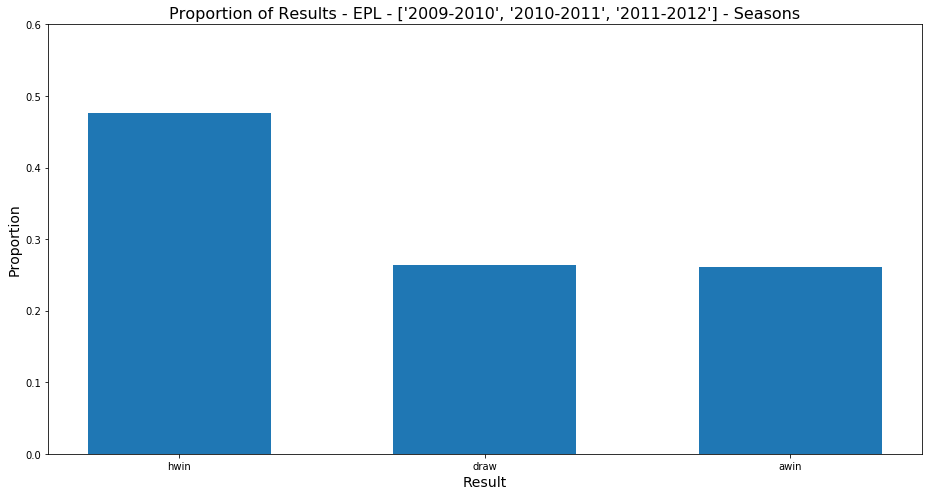

In [6]:
fig, ax = plt.subplots(figsize=(13,7))

ax.bar(results.index, results.values, width=0.6)

ax.set_ylim(0, 0.6)
ax.set_title(f'Proportion of Results - EPL - {seasons} - Seasons', fontsize=16)
ax.set_xlabel('Result', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
plt.tight_layout()
plt.show();